## 1. Apa itu Data Profilling -> Kegiatan merangkum dataset menggunakan Statistik Deskriptif

## 2. Import Library

In [33]:
import numpy as np
import pandas as pd
import io
import ydata_profiling

## 3. Importing Data

In [34]:
# Load dataset
retail_raw=pd.read_csv(r"https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv")
retail_raw.to_csv(r"C:\Users\usepa\Documents\01 - My Courses\02 - Big Data\04 - 2024\01 - Data Scientist DQLab Academy\Data Quality with Python for Beginner\retail_raw.csv")
display(retail_raw.head())

order_id  order_date  customer_id             city     province product_id  \
0   1703458  17/10/2019        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  24/10/2019        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  03/11/2019        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  19/08/2019        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  16/10/2019        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J      10.0    740000.0  
1  BRAND_R       2.0    604000.0  
2  BRAND_C       8.0   1045000.0  
3  BRAND_A       4.0    205000.0  
4  BRAND_R       2.0         NaN

## 4. Inspeksi Tipe Data

In [35]:
# Cetak tipe data di setiap kolom retail_raw
print(retail_raw.dtypes)

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object


## 5. Descriptive Statistics

In [36]:
# Descriptive Statistics - Part 1
# Kolom City 
length_city=len(retail_raw["city"])
print("Length kolom city: %d"%length_city)
# Tugas Praktek : Kolom product_id
length_product_id=len(retail_raw["product_id"])
print("Length kolom product_id: %d"%length_product_id)

# Descriptive Statistics - Part 2
# Kolom City 
count_city=retail_raw["city"].count()
print("Count kolom city: %d"%count_city)
# Tugas Praktek : Kolom product_id
count_product_id=retail_raw["product_id"].count()
print("Count kolom product_id: %d"%count_product_id)

# Descriptive Statistics - Part 3
# Missing value pada kolom city
number_of_missing_value_city = length_city - count_city
ratio_of_missing_value_city = number_of_missing_value_city/length_city
pct_of_missing_value_city = ratio_of_missing_value_city*100
print(f"\nNumber of Missing value of City -> {number_of_missing_value_city}")
print(f"Ration of Missig Value of City -> {ratio_of_missing_value_city}")
print(f"Percentation of Missing Value of City -> {pct_of_missing_value_city}%")

# Tugas Praktek
# Missing Value pada column product_id
number_of_missing_value_product_id = length_product_id - count_product_id
ratio_of_missing_value_product_id = number_of_missing_value_product_id/length_product_id
pct_of_missing_value_product_id = ratio_of_missing_value_product_id*100
print(f"\nNumber of Missing Value of Product Id -> {number_of_missing_value_product_id}")
print(f"Ration of Missing Value of Product Id -> {ratio_of_missing_value_product_id}")
print(f"Percentation of Missing Value of Product Id -> {pct_of_missing_value_product_id}%")

Length kolom city: 5000
Length kolom product_id: 5000
Count kolom city: 4984
Count kolom product_id: 4989

Number of Missing value of City -> 16
Ration of Missig Value of City -> 0.0032
Percentation of Missing Value of City -> 0.32%

Number of Missing Value of Product Id -> 11
Ration of Missing Value of Product Id -> 0.0022
Percentation of Missing Value of Product Id -> 0.22%


In [37]:
# Descriptive statistics kolom quantity
print(f"Kolom Quantity")
print(f"Minimum value of quantity column -> {retail_raw['quantity'].min()}")
print(f"Minimun value of quantity column -> {retail_raw['quantity'].max()}")
print(f"Mean value of quantity column -> {retail_raw['quantity'].mean()}")
print(f"Median value of quantity column -> {retail_raw['quantity'].median()}")
print(f"Modus value of quantity column -> {retail_raw['quantity'].mode()}")
print(f"Quantile value of quantity column -> {retail_raw['quantity'].quantile([0.25, 0.5, 0.75])}")

print(f"\nItem Price")
print(f"Minimum value of quantity column -> {retail_raw['item_price'].min()}")
print(f"Minimun value of item_price column -> {retail_raw['item_price'].max()}")
print(f"Mean value of item_price column -> {retail_raw['item_price'].mean()}")
print(f"Median value of item_price column -> {retail_raw['item_price'].median()}")
print(f"Modus value of item_price column -> {retail_raw['item_price'].mode()}")
print(f"Quantile value of item_price column -> {retail_raw['item_price'].quantile([0.25, 0.5, 0.75])}")

Kolom Quantity
Minimum value of quantity column -> 1.0
Minimun value of quantity column -> 720.0
Mean value of quantity column -> 11.423987164059366
Median value of quantity column -> 5.0
Modus value of quantity column -> 0    1.0
Name: quantity, dtype: float64
Quantile value of quantity column -> 0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Item Price
Minimum value of quantity column -> 26000.0
Minimun value of item_price column -> 29762000.0
Mean value of item_price column -> 933742.7311008623
Median value of item_price column -> 604000.0
Modus value of item_price column -> 0    590000.0
Name: item_price, dtype: float64
Quantile value of item_price column -> 0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


In [38]:
# Correlation
print(f"Korelasi quantity column dan item_price column")
print(f"Korelasi antara nilai quantity dan item_price ->\n {retail_raw[['quantity','item_price']].corr()}")

Korelasi quantity column dan item_price column
Korelasi antara nilai quantity dan item_price ->
             quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


## 6. Missing Data

In [39]:
## Checking Column that Have Missing Value
print(f"Column that have missing value: ")
print(f"{retail_raw.isnull().sum()}")
retail_raw_1 = retail_raw.copy()
retail_raw_2 = retail_raw.copy()
print(f"\nFillna missing value with Imputation Mean Value: ")
print(f"{retail_raw['quantity'].fillna(retail_raw['quantity'].mean())}")
print(f"\nFillna missing value with Drop Missing Value: ")
print(f"{retail_raw['quantity'].dropna()}")
print(f"\nTugas Praktek")
print(f"Filna missing value with Imputation Mean Value for Item Price Column:")
print(f"{retail_raw['item_price'].fillna(retail_raw['item_price'].mean())}")


Column that have missing value: 
order_id        0
order_date      0
customer_id     0
city           16
province       12
product_id     11
brand           0
quantity       14
item_price     13
dtype: int64

Fillna missing value with Imputation Mean Value: 
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Fillna missing value with Drop Missing Value: 
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64

Tugas Praktek
Filna missing value with Imputation Mean Value for Item Price Column:
0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
N

## 7. Outliers

In [40]:
# Q1 - Q2 - Q3
print(f"Value of Interquantile for Quantity Column:")
Q1 = retail_raw['quantity'].quantile(0.25)
Q2 = retail_raw['quantity'].quantile(0.50)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1
print(f"\nValue of Q1 quantity column -> {Q1}")
print(f"Value of Q3 quantity column -> {Q3}")
print(f"Value of IQR quantity column -> {IQR}")

print(f"\nCheck Ukuran dataset sebelum Data Outlier dibuang:")
print(f"Dimensi dataset adalah -> {retail_raw.shape[0]} Baris -> {retail_raw.shape[1]} Kolom")

print(f"\nMenghapus Outlier")
treshold_outliers = 1.5
outliers_indices = (retail_raw["quantity"] < (Q1 - treshold_outliers*IQR)) | (retail_raw["quantity"] > (Q3 + treshold_outliers*IQR))
retail_raw_no_outliers = retail_raw[~outliers_indices]

print(f"Dimensi dataset setelah data outlier dihapus -> {retail_raw_no_outliers.shape[0]} Baris -> {retail_raw_no_outliers.shape[1]} Kolom")

Value of Interquantile for Quantity Column:

Value of Q1 quantity column -> 2.0
Value of Q3 quantity column -> 12.0
Value of IQR quantity column -> 10.0

Check Ukuran dataset sebelum Data Outlier dibuang:
Dimensi dataset adalah -> 5000 Baris -> 9 Kolom

Menghapus Outlier
Dimensi dataset setelah data outlier dihapus -> 4699 Baris -> 9 Kolom


In [41]:
# Tugas Praktek
print(f"Value of Interquantile for item_price Column:")
Q1 = retail_raw['item_price'].quantile(0.25)
Q2 = retail_raw['item_price'].quantile(0.50)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1
print(f"\nValue of Q1 item_price column -> {Q1}")
print(f"Value of Q3 item_price column -> {Q3}")
print(f"Value of IQR item_price column -> {IQR}")

print(f"\nCheck Ukuran dataset sebelum Data Outlier dibuang:")
print(f"Dimensi dataset adalah -> {retail_raw.shape[0]} Baris -> {retail_raw.shape[1]} Kolom")

print(f"\nMenghapus Outlier")
treshold_outliers = 1.5
outliers_indices = (retail_raw["item_price"] < (Q1 - treshold_outliers*IQR)) | (retail_raw["item_price"] > (Q3 + treshold_outliers*IQR))
retail_raw_no_outliers = retail_raw[~outliers_indices]

print(f"Dimensi dataset setelah data outlier dihapus -> {retail_raw_no_outliers.shape[0]} Baris -> {retail_raw_no_outliers.shape[1]} Kolom")

Value of Interquantile for item_price Column:

Value of Q1 item_price column -> 450000.0
Value of Q3 item_price column -> 1045000.0
Value of IQR item_price column -> 595000.0

Check Ukuran dataset sebelum Data Outlier dibuang:
Dimensi dataset adalah -> 5000 Baris -> 9 Kolom

Menghapus Outlier
Dimensi dataset setelah data outlier dihapus -> 4541 Baris -> 9 Kolom


In [42]:
def make_df_no_outlier(data, column):
  for name_column in column:
    Q1 = data[name_column].quantile(0.25)
    # Q2 = data[name_column].quantile(0.50)
    Q3 = data[name_column].quantile(0.75)
    IQR = Q3 - Q1
    treshold_outliers = 1.5
    outliers_indices = (data[name_column] < (Q1 - treshold_outliers*IQR)) | (data[name_column] > (Q3 + treshold_outliers*IQR))
    data_no_outliers = data[~outliers_indices]
  return data_no_outliers

retail_raw_clean = make_df_no_outlier(retail_raw, ["quantity", "item_price"])
display(retail_raw_clean)   

order_id  order_date  customer_id             city     province  \
0      1703458  17/10/2019        14004  Jakarta Selatan  DKI Jakarta   
1      1706815  24/10/2019        17220  Jakarta Selatan  DKI Jakarta   
2      1710718  03/11/2019        16518    Jakarta Utara  DKI Jakarta   
3      1683592  19/08/2019        16364    Jakarta Barat  DKI Jakarta   
4      1702573  16/10/2019        15696    Jakarta Timur  DKI Jakarta   
...        ...         ...          ...              ...          ...   
4995   1724011  01/12/2019        12838        Tangerang       Banten   
4996   1676302  28/07/2019        13833            Bogor   Jawa Barat   
4997   1706071  23/10/2019        16332    Jakarta Timur  DKI Jakarta   
4998   1703620  17/10/2019        13055    Jakarta Barat  DKI Jakarta   
4999   1720036  24/11/2019        17609    Jakarta Pusat  DKI Jakarta   

     product_id    brand  quantity  item_price  
0         P1910  BRAND_J      10.0    740000.0  
1         P2934  BRAND_R       2.0    604000.0  
2         P0908  BRAND_C       8.0   1045000.0  
3         P0128  BRAND_A       4.0    205000.0  
4         P2968  BRAND_R       2.0         NaN  
...         ...      ...       ...         ...  
4995      P3047  BRAND_R       2.0    450000.0  
4996      P0760  BRAND_C       3.0   1465000.0  
4997      P1681  BRAND_H       4.0    747000.0  
4998      P0757  BRAND_C       8.0    695000.0  
4999      P3334  BRAND_S       1.0   1045000.0  

[4541 rows x 9 columns]

## 8. Duplicate Data

In [43]:
# Duplicate Data
print(f"Check ukuran baris dan kolom dataset sebelum duplikasi data dibuang: ")
print(f"Total Baris Data Duplikat -> {retail_raw.duplicated().sum()}")
print(f"Ukuran baris dan kolom dataset sebelum Data Duplikat dihapus -> {retail_raw.shape[0]} Baris -> {retail_raw.shape[1]} Kolom")

# Menghapus Data Duplikat
retail_raw = retail_raw.drop_duplicates()
print(f"Ukuran baris dan kolom dataset setelah data duplikat dihapus -> {retail_raw.shape[0]} Baris -> {retail_raw.shape[1]} Kolom")

Check ukuran baris dan kolom dataset sebelum duplikasi data dibuang: 
Total Baris Data Duplikat -> 7
Ukuran baris dan kolom dataset sebelum Data Duplikat dihapus -> 5000 Baris -> 9 Kolom
Ukuran baris dan kolom dataset setelah data duplikat dihapus -> 4993 Baris -> 9 Kolom


## 9. Case Studi: Data Profilling

In [44]:
# Load Dataset
uncleaned_raw = pd.read_csv(r"https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv")
display(uncleaned_raw.head())

# Mengecek jumlah baris dan kolom dataset
print(f"\nTotal Baris dan Kolom untuk setiap dataset -> {uncleaned_raw.shape[0]} Baris -> {uncleaned_raw.shape[1]} Kolom")

# Mengecek Nilai Missing Value
print(f"\nChecking Missing Value for Each Column: ")
print(uncleaned_raw.isnull().sum())
print(f"\nPersentasi Total Missing Value pada Quantity Column -> Total Missing Value Quantity Column -> {uncleaned_raw['Quantity'].isnull().sum().sum()/uncleaned_raw.shape[0] * 100 : .2f}%")

# Mengisi nilai Missing Value dengan Quantity Mean Value
uncleaned_raw["Quantity"] = uncleaned_raw["Quantity"].fillna(uncleaned_raw["Quantity"].mean())

# Mengecek jumlah baris dan kolom dataset
print(f"\nTotal Baris dan Kolom untuk setiap dataset -> {uncleaned_raw.shape[0]} Baris -> {uncleaned_raw.shape[1]} Kolom")

# Mengecek Nilai Missing Value
print(f"\nChecking Missing Value for Each Column: ")
print(uncleaned_raw.isnull().sum())
print(f"\nPersentasi Total Missing Value pada Quantity Column -> Total Missing Value Quantity Column -> {uncleaned_raw['Quantity'].isnull().sum().sum()/uncleaned_raw.shape[0] * 100 : .2f}%")

InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan


Total Baris dan Kolom untuk setiap dataset -> 505 Baris -> 7 Kolom

Checking Missing Value for Each Column: 
InvoiceNo       0
Description     0
Quantity       20
InvoiceDate     0
UnitPrice       0
CustomerID      0
City            0
dtype: int64

Persentasi Total Missing Value pada Quantity Column -> Total Missing Value Quantity Column ->  3.96%

Total Baris dan Kolom untuk setiap dataset -> 505 Baris -> 7 Kolom

Checking Missing Value for Each Column: 
InvoiceNo      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
City           0
dtype: int64

Persentasi Total Missing Value pada Quantity Column -> Total Missing Value Quantity Column ->  0.00%


## 10. Case Study: Data Cleansing - Part 1

In [47]:
# Load Library
import matplotlib.pyplot as plt
import seaborn as sns

## 11. Case Study: Data Cleansing - Part 2

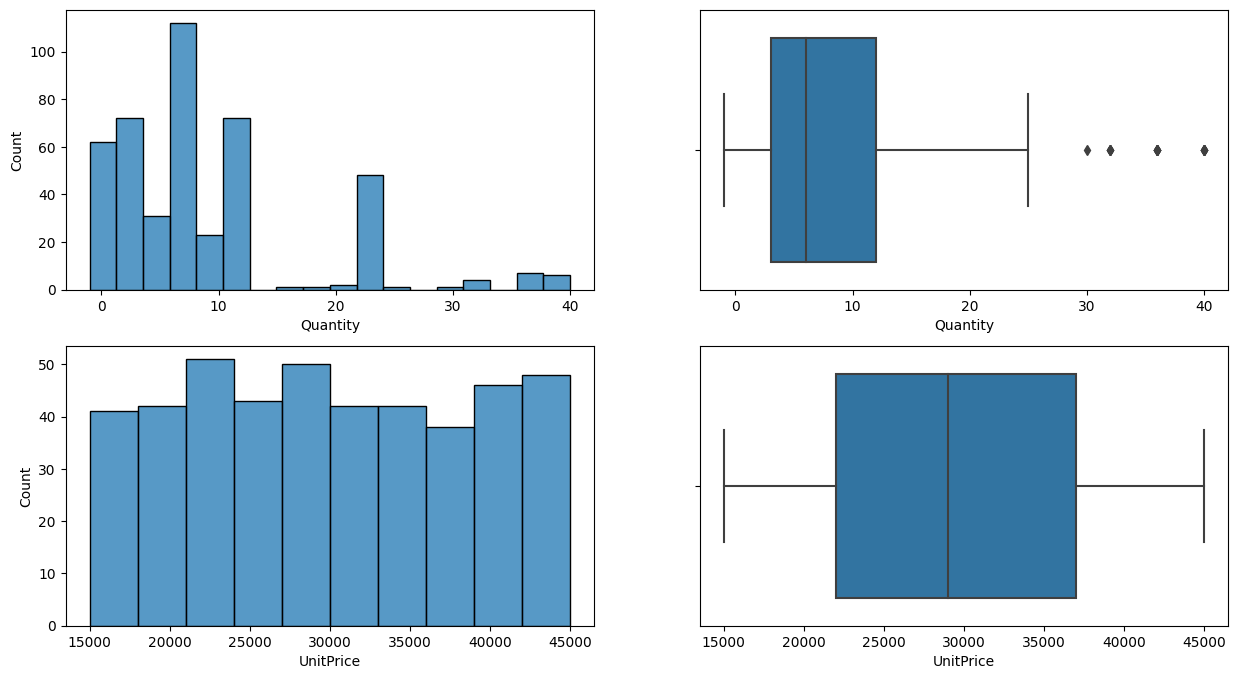

In [50]:
# Menghapus Data Outliers pada Column Quantity dan UnitPrice
independent_column = ["Quantity", "UnitPrice"]
def make_df_no_outlier(data, column):
  data_new = data
  for name_column in column:
    Q1 = data_new[name_column].quantile(0.25)
    Q3 = data_new[name_column].quantile(0.75)
    IQR = Q3 - Q1
    treshold_outliers = 1.5
    outliers_indices = (data_new[name_column] < (Q1 - treshold_outliers*IQR)) | (data_new[name_column] > (Q3 + treshold_outliers*IQR))
    data_no_outliers = data_new[~outliers_indices]
    data_new = data_no_outliers
  return data_no_outliers

uncleaned_raw_no_row = make_df_no_outlier(uncleaned_raw, independent_column)

fig, axs = plt.subplots(2, 2, figsize = (15, 8))
for index, column in enumerate(independent_column):
  sns.histplot(data=uncleaned_raw_no_row, x=column, ax=axs[index][0])
  sns.boxplot(data=uncleaned_raw_no_row, x=column, ax=axs[index][1])
plt.show()